# Dominos

- A domino consists of two half-Dominoes. Each half-domino shows a number between 0 and N.
- Each domino exists exactly once: 0-0, 0-1, etc. up to N-N. Note that there is no difference between X-Y and X-Y (e.g. 1-2 and 2-1).
- Divide the grid along the grid lines into dominoes so that each domino occurs exactly once.

----

- 谜题“多米诺”由两张半多米诺骨牌组成。每个半多米诺骨牌显示一个介于 0 和 N 之间的数字。
- 每张多米诺骨牌只存在一次：0-0、0-1 等，直到 N-N。请注意，X-Y 和 X-Y 之间没有区别（例如 1-2 和 2-1）
- 沿网格线将网格划分为多米诺骨牌，使每个多米诺骨牌只出现一次。

In [1]:
def readGrid(path):
    with open(f"../assets/data/Dominos/{path}.txt") as f:
        num = f.readline()
        m, n = num.split(" ")[0], num.split(" ")[1]
        grid = f.readlines()
        res = [g.strip().split(" ") for g in grid]
        return int(m), int(n), res

if __name__ == "__main__":
    m, n, grid = readGrid("problems/5_7x8")
    print(m, n)
    print(len(grid), len(grid[0]))
    print(grid)

7 8
7 8
[['5', '5', '4', '0', '2', '4', '4', '5'], ['6', '2', '4', '6', '3', '1', '0', '1'], ['1', '1', '2', '0', '3', '2', '2', '6'], ['3', '5', '0', '0', '3', '2', '1', '6'], ['1', '2', '5', '2', '6', '5', '1', '3'], ['5', '4', '6', '0', '1', '4', '0', '0'], ['3', '6', '4', '3', '3', '5', '6', '4']]


In [20]:
import numpy as np
from ortools.sat.python import cp_model as cp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.pyplot import MultipleLocator

def dominos_solver(X, Y, grid):
    model = cp.CpModel()
    solver = cp.CpSolver()
    x = {}
    y = {}
    domino_nums = {}
    digit_fill = {}
    for i in range(X):
        for j in range(Y):
            digit_fill[i, j] = []
            # 记录哪些方格会占据这个格子
            
    # 处理第一个形状
    for i in range(X):
        for j in range(Y - 1):
            x[0, i, j] = model.NewBoolVar(f"x_0_{i}_{j}")
            a_, b_ = int(grid[i][j]), int(grid[i][j + 1])
            if a_ > b_:
                a_, b_ = b_, a_
            if f"{a_}_{b_}" not in domino_nums:
                domino_nums[f"{a_}_{b_}"] = [x[0, i, j]]
            else:
                domino_nums[f"{a_}_{b_}"].append(x[0, i, j])
            digit_fill[i, j].append(x[0, i, j])
            digit_fill[i, j + 1].append(x[0, i, j])
    
    # 处理第二个形状
    for i in range(X - 1):
        for j in range(Y):
            x[1, i, j] = model.NewBoolVar(f"x_1_{i}_{j}")
            a_, b_ = int(grid[i][j]), int(grid[i + 1][j])
            if a_ > b_:
                a_, b_ = b_, a_
            if f"{a_}_{b_}" not in domino_nums:
                domino_nums[f"{a_}_{b_}"] = [x[1, i, j]]
            else:
                domino_nums[f"{a_}_{b_}"].append(x[1, i, j])
            digit_fill[i, j].append(x[1, i, j])
            digit_fill[i + 1, j].append(x[1, i, j])
    
    for i in range(X):
        for j in range(Y):
            model.Add(sum(digit_fill[i, j]) == 1)
    
    for k, v in domino_nums.items():
        model.Add(sum(v) <= 1)
    
    status = solver.Solve(model)
    result = []
    if status == cp.OPTIMAL:
        for k, v in x.items():
            if solver.Value(v) > 1e-5:
                result.append(k)
    return result

if __name__ == "__main__":
    X, Y, grid = readGrid("problems/5_7x8")
    result = dominos_solver(X, Y, grid)
    for r in result:
        print(r, end = " ")



(0, 0, 0) (0, 0, 6) (0, 1, 0) (0, 1, 6) (0, 2, 1) (0, 2, 5) (0, 3, 1) (0, 5, 5) (0, 6, 0) (0, 6, 2) (0, 6, 4) (0, 6, 6) (1, 0, 2) (1, 0, 3) (1, 0, 4) (1, 0, 5) (1, 2, 0) (1, 2, 3) (1, 2, 4) (1, 2, 7) (1, 3, 5) (1, 3, 6) (1, 4, 0) (1, 4, 1) (1, 4, 2) (1, 4, 3) (1, 4, 4) (1, 4, 7) 

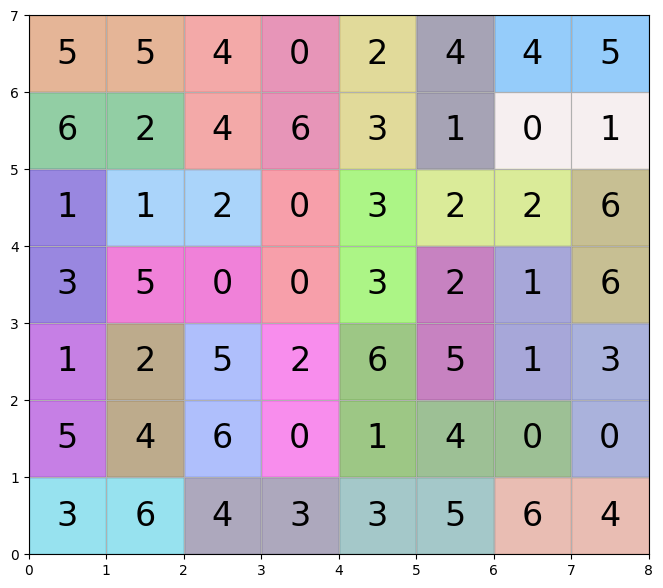

In [19]:
import random

def coordinatesParser(m, n, idx):
    """_summary_
        进行坐标转换 
    Args:
        m (_type_): _description_
        n (_type_): _description_
        idx (_type_): _description_

    Returns:
        _type_: _description_
    """
    ori_x , ori_y = idx // n, idx % n 
    return (0.5 + ori_y, 0.5 + ( m - ori_x - 1) )

def coordinatesParserNodes(m, n, idx):
    ori_x, ori_y = idx // (n + 1), idx % (n + 1)
    return (ori_y, m - ori_x )

def generate_random_color():
    # 生成三个随机的十六进制数字，每个数字的范围是0-255
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    
    # 将RGB值转换为十六进制字符串
    hex_color = f'#{r:02x}{g:02x}{b:02x}'
    return hex_color


# Visualize 2 b done
def Vis(m, n, grid, result):
    grid_color = dict()
    for v in result:
        grid_color[f"{v[0]}_{v[1]}_{v[2]}"] = generate_random_color()

    plt.figure(figsize=(n,m))

    ax = plt.gca()
    x_major_locator = MultipleLocator(1)
    y_major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(x_major_locator)
    # 把x/y轴的主刻度设置为1的倍数
    ax.yaxis.set_major_locator(y_major_locator)

    plt.xlim(0,n)
    plt.ylim(0,m)


    # 绘制无法被访问的方块
    for i in range(m):
        for j in range(n):
            if grid[i][j] != -1:    
                new_coor = coordinatesParser(m, n, i * n + j)
                ax.text(new_coor[0], new_coor[1], str(grid[i][j]), 
                        horizontalalignment = "center", 
                        verticalalignment = 'center',
                        fontsize = 24)
    for v in result:
        if v[0] == 0:
            i, j = v[1], v[2]
            ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = grid_color[f"{v[0]}_{v[1]}_{v[2]}"], alpha = 0.5))
            ax.add_patch(Rectangle((j + 1, X - i - 1), 1, 1, color = grid_color[f"{v[0]}_{v[1]}_{v[2]}"], alpha = 0.5))
        else:
            i, j = v[1], v[2]
            ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = grid_color[f"{v[0]}_{v[1]}_{v[2]}"], alpha = 0.5))
            ax.add_patch(Rectangle((j, X - i - 2), 1, 1, color = grid_color[f"{v[0]}_{v[1]}_{v[2]}"], alpha = 0.5))

    plt.grid(linestyle = "-")
    
    plt.show()

if __name__ == "__main__":
    Vis(X, Y, grid, result)